# Explore here

PROYECTO SERIES DE TIEMPO

In [2]:
import pandas as pd
import numpy as np
import os
import requests

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

from pmdarima import auto_arima

import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
archivo = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

In [ ]:
# Nombre y ruta de la carpeta para datos en crudo
data_folder = "/workspaces/Proyecto_serie_temp_1/data/raw"
data_path = os.path.join(data_folder, "sales.csv")

# Crear la carpeta si no existe
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Petición para descargar el fichero
response = requests.get(archivo)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Guardar el contenido en la carpeta en crudo
    with open(data_path, 'wb') as file:
        file.write(response.content)
    print("Archivo guardado en crudo exitosamente en:", data_path)
else:
    print("Error al descargar el archivo:", response.status_code)

# Leer el archivo CSV descargado 
df = pd.read_csv(data_path)

Archivo guardado en crudo exitosamente en: /workspaces/Proyecto_serie_temp_1/data/raw/sales.csv


In [6]:
df.head(50)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
5,2022-09-08 17:10:08.079328,60.081865
6,2022-09-09 17:10:08.079328,68.466704
7,2022-09-10 17:10:08.079328,67.765106
8,2022-09-11 17:10:08.079328,70.512261
9,2022-09-12 17:10:08.079328,74.656453


In [7]:
df.shape

(366, 2)

In [8]:
ts = df["sales"]
ts.head()

0    55.292157
1    53.803211
2    58.141693
3    64.530899
4    66.013633
Name: sales, dtype: float64

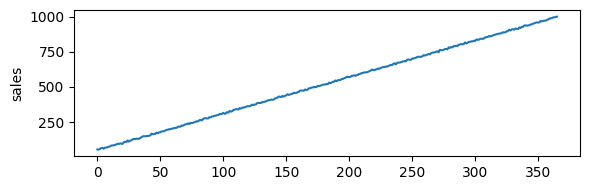

In [ ]:
fig, axis = plt.subplots(figsize = (6, 2))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

¿Cuál es el tensor de la serie temporal?
Diaria
¿Cuál es la tendencia?
Postivia ascendente
¿Es estacionaria?
No lo parece
¿Existe variabilidad o presencia de ruido?


In [10]:
decomposition = seasonal_decompose(ts, period = 30)
decomposition

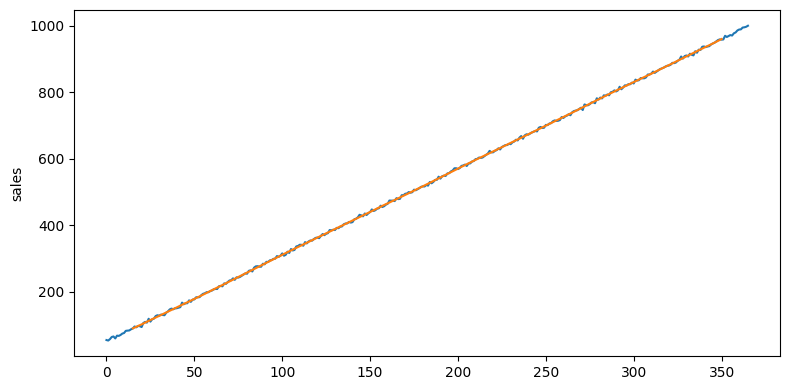

In [11]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

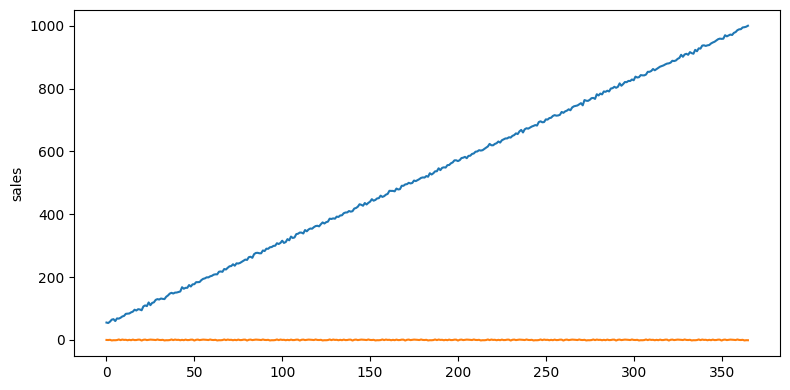

In [12]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts) # Representa el número de ventas diarias
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [13]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [14]:
test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

No es estacionaria, p-value >0.05

ValueError: 'sales' is not one of the example datasets.